<a href="https://colab.research.google.com/github/abhishektripathi66/RecomendationSystem/blob/main/next_word_predictor_using_lstms_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install tensorflow tensorflow-text

In [30]:
text = """Abhishek is a very good boy.
Abhishek is kind.
Abhishek is well.
Abhishek is fine.
I am studying in Delhi Technological University.
I am living in Delhi.
I am a self learner.
I want to learn new skills everyday.
I go to walk early in the morning.
Do you want to tour in UK."""

# let's perform some **preprocessing** on text...

In [ ]:
import re

# Lowercasing the text
lowercase_text = text.lower()

# Removing extra newlines between sentences
cleaned_text = re.sub(r'\n\s*\n', '\n', lowercase_text)

print("Lowercased Text with Extra Newlines Removed:\n")
print(cleaned_text)

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([cleaned_text])

# to see, what numbers are allocated to what words, there's an attribute name "word_index"

In [76]:
tokenizer.word_index

{'i': 1,
 'abhishek': 2,
 'is': 3,
 'in': 4,
 'am': 5,
 'to': 6,
 'a': 7,
 'delhi': 8,
 'want': 9,
 'very': 10,
 'good': 11,
 'boy': 12,
 'kind': 13,
 'well': 14,
 'fine': 15,
 'studying': 16,
 'technological': 17,
 'university': 18,
 'living': 19,
 'self': 20,
 'learner': 21,
 'learn': 22,
 'new': 23,
 'skills': 24,
 'everyday': 25,
 'go': 26,
 'walk': 27,
 'early': 28,
 'the': 29,
 'morning': 30,
 'do': 31,
 'you': 32,
 'tour': 33,
 'uk': 34}

# now we'll try to create a dataset from this text as a supervised learning task dataset, where there's an input and an output
> ### for ex. if text = "How are you all?"
===========================================
> ### Input: **How**
> ### Output: **are**
===========================================
> ### Input: **How are**
> ### Output: **you** and so on...

In [35]:
input_sequences = []
for sentence in cleaned_text.split("\n"):
    # convert words into numbers
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
    print(tokenized_sentence)

    for i in range(1, len(tokenized_sentence)):
        input_sequences.append(tokenized_sentence[:i+1])

[2, 3, 7, 10, 11, 12]
[2, 3, 13]
[2, 3, 14]
[2, 3, 15]
[1, 5, 16, 4, 8, 17, 18]
[1, 5, 19, 4, 8]
[1, 5, 7, 20, 21]
[1, 9, 6, 22, 23, 24, 25]
[1, 26, 6, 27, 28, 4, 29, 30]
[31, 32, 9, 6, 33, 4, 34]


# the input shape must be same when passing the sequences into the neural networks, so for that we will applying **padding** in front of every sentence with respect to which sentence has max. number of words.

In [36]:
max_length = max([len(x) for x in input_sequences])
max_length # there present a sentence which has maximum 111 words.

8

# now we'll apply **zero_padding**

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_length, padding='pre')

In [ ]:
padded_input_sequences

In [40]:
X = padded_input_sequences[:,:-1]
y = padded_input_sequences[:,-1]

In [ ]:
X

In [42]:
y

array([ 3,  7, 10, 11, 12,  3, 13,  3, 14,  3, 15,  5, 16,  4,  8, 17, 18,
        5, 19,  4,  8,  5,  7, 20, 21,  9,  6, 22, 23, 24, 25, 26,  6, 27,
       28,  4, 29, 30, 32,  9,  6, 33,  4, 34], dtype=int32)

# now from our dataset (X and y), as we have **discrete values**, we can use **multi-class classification.**

In [43]:
X.shape, y.shape

((44, 7), (44,))

> #### X.shape = (1478, 110) => means **in each sentence there are 110 words** and there are **total 1478 sentences**.

# now we'll **ONE HOT ENCODE** the y, which is currently a scaler.

In [44]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=len(tokenizer.word_index)+1)
# +1 because OHE starts from 0 and word_index returned output started from 1

In [45]:
y.shape     # (1478, 535), 535 because there are total 535 words in our vocabulary.

(44, 35)

In [ ]:
y   # each sentence is represented by a sparse vector having 535 values

# Now we're reading with **TRAINING THE DATA**

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
model = Sequential()
model.add(Embedding(input_dim=35, output_dim=8))
# there are total 535 words in our vocabulary and 110 is the length of each sentence
model.add(LSTM(units=256))
model.add(Dense(units=35, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor="accuracy", patience=100, restore_best_weights=True)
history = model.fit(X, y, epochs=200, callbacks=[early_stopping])

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.0919 - loss: 3.5562
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0919 - loss: 3.5051 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0919 - loss: 3.3341
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1269 - loss: 3.3217
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1790 - loss: 3.2245
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0966 - loss: 3.2843
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2301 - loss: 3.0603
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1581 - loss: 2.8440 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1837 - loss: 2.7349 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2244 - loss: 2.5926
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2756 - loss: 2.4627
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2244 -

# Knowing the summary of the model...

In [ ]:
model.summary()

# Let's plot accuracy v/s loss curve

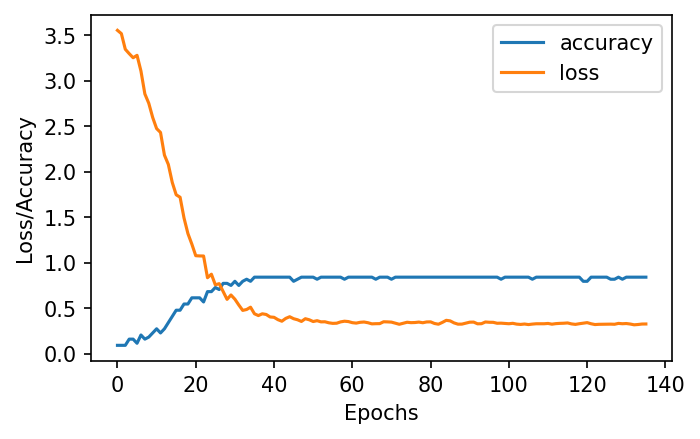

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

plot_1 = pd.DataFrame(history.history)
plt.figure(dpi=150, figsize = (5,3))
plt.plot(plot_1)
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(plot_1)

# Finally let's watch the output on giving **LLMs are** as an input...

In [55]:
import numpy as np
import time

In [84]:
text = "i am"

for i in range(6):
    previousword = text.split(" ")[-1]
    # tokenize
    token_text = tokenizer.texts_to_sequences([text])[0]
    print(token_text)
    # padding
    padded_token_text = pad_sequences([token_text], maxlen=8, padding='pre')
    print(padded_token_text)
    # predict
    position = np.argmax(model.predict(padded_token_text))

    # print word at the particular position in tokenizer.word_index
    for word, index in tokenizer.word_index.items():
        if index == position:
            text = text + " " + word
            print(text)
            time.sleep(2)

[1, 5]
[[0 0 0 0 0 0 1 5]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
i am studying
[1, 5, 16]
[[ 0  0  0  0  0  1  5 16]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
i am studying in
[1, 5, 16, 4]
[[ 0  0  0  0  1  5 16  4]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
i am studying in delhi
[1, 5, 16, 4, 8]
[[ 0  0  0  1  5 16  4  8]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
i am studying in delhi technological
[1, 5, 16, 4, 8, 17]
[[ 0  0  1  5 16  4  8 17]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
i am studying in delhi technological university
[1, 5, 16, 4, 8, 17, 18]
[[ 0  1  5 16  4  8 17 18]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
i am studying in delhi technological university university


# I think it's performing well :)